Liquidation Theory

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
stock_ticker_to_compare = 'V'

In [3]:
df_ww = pd.read_csv('Documents/Whale_wisdom/melvin_capital_management_lp-current-2021-02-13_16_11_41.csv') #make df out of csv
ticker_list = [i for i in df_ww['Symbol']] #list of stocks they own by symbol

df_sh = pd.read_csv('Documents/scrape/Melvin_holdings_historicals.csv')
df_gme = pd.read_csv('Documents/scrape/GME_historicals.csv')
df_2 = df_sh[df_sh['Symbol'].str.match('^'+stock_ticker_to_compare+'$')]

print(ticker_list)
#print(df_sh)

['FISV', 'BABA', 'EXPE', 'BKNG', 'LB', 'NOW', 'FISV', 'BABA', 'AAP', 'AMZN', 'PINS', 'AZO', 'FICO', 'LVS', 'V', 'DOCU', 'ADBE', 'MA', 'GOOGL', 'NKE', 'BKNG', 'JD', 'LH', 'ALGN', 'EXPE', 'MCD', 'DDOG', 'SE', 'NUAN', 'TJX', 'V', 'TXRH', 'LOW', 'MSFT', 'IT', 'IAA', 'H', 'PLAN', 'AEO', 'AMD', 'TPX', 'GSX', 'WYNN', 'PYPL', 'HLT', 'MSCI', 'WDAY', 'DDOG', 'DRI', 'VTRS', 'DECK', 'PINS', 'RACE', 'SBAC', 'LVS', 'LYV', 'DPZ', 'TEAM', 'BURL', 'WYNN', 'EAT', 'MLM', 'AAP', 'LGND', 'GME', 'FIZZ', 'SQ', 'CAR', 'BBBY', 'ELAN', 'KAR', 'TWTR', 'IRBT', 'RHP', 'OLLI', 'IRM', 'TRN', 'ADYYF', 'AEO', 'TUP', 'VIAC', 'HASI', 'LAUR', 'DDS', 'SKT', 'MNKKQ', 'CROX', 'TLRDQ', 'BBY', 'WBA', 'THO', 'YUM', 'KR', 'NFLX', 'RHI', 'VRSN', 'FIS', 'TPX', 'CSGP', 'NWL', 'CMPR', 'EL', 'CHD', 'MHK', 'MED', 'CRM', 'WEN', 'SPWR', 'FICO', 'FLT', 'DNKN', 'FB', 'JD', 'BILL', 'TWLO', 'TRHC', 'CWH', 'CDAY', 'PLAN']


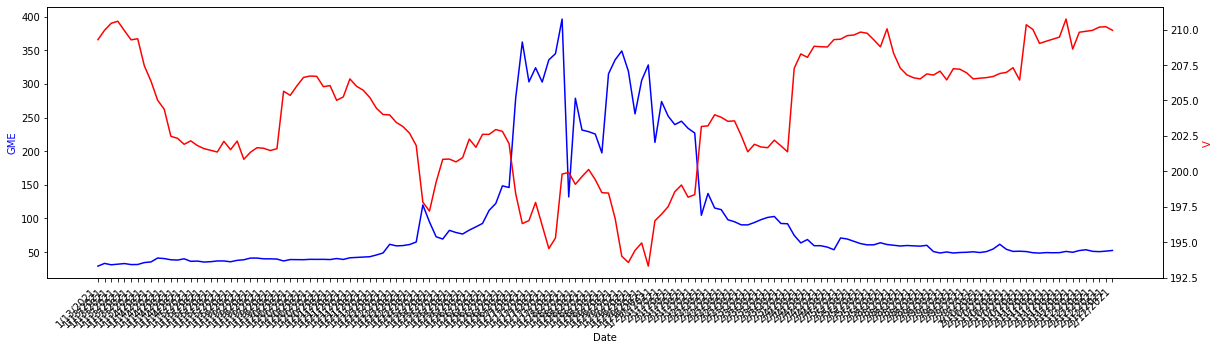

In [4]:

fig, ax1 = plt.subplots(figsize = (20,5))

ax2 = ax1.twinx()
ax1.plot(df_gme['Datetime'], df_gme['Close'], color='blue')
ax2.plot(df_2['Datetime'], df_2['Close'], color='red')

xticklabels = df_sh['Date']
ax1.set_xlabel('Date')
ax1.set_xticklabels(xticklabels, rotation = 45, ha="right")
ax1.set_ylabel('GME', color='blue')
ax2.set_ylabel(stock_ticker_to_compare, color='red')
plt.show()



In [5]:
x = [i for i in df_gme['Close']]
y = [i for i in df_2['Close']]
coeff = np.corrcoef(x,y)

print(coeff)

[[ 1.         -0.75524362]
 [-0.75524362  1.        ]]


In [6]:
ticker_coeff_dict = {}
for ticker in ticker_list:
    #print(ticker)
    df_3 = df_sh[df_sh['Symbol'].str.match('^'+ticker+'$')]
    x = [i for i in df_gme['Close']]
    y = [i for i in df_3['Close']]
    try:
        coeff = np.corrcoef(x,y)
        ticker_coeff_dict[ticker] = coeff[1][0]
        #print('-Found-')
    except:
        print('Ticker not found: {}'.format(ticker))
        
    

Ticker not found: LVS
Ticker not found: JD
Ticker not found: PLAN
Ticker not found: LVS
Ticker not found: GME
Ticker not found: ADYYF
Ticker not found: TLRDQ
Ticker not found: DNKN
Ticker not found: JD
Ticker not found: PLAN


In [7]:
print(ticker_coeff_dict)
print()
print('calulated so far: {x}'.format(x=len(ticker_coeff_dict)))

{'FISV': -0.6935514769988045, 'BABA': 0.09194586511617335, 'EXPE': -0.8367967781995808, 'BKNG': -0.8240405585944007, 'LB': -0.7960983844146525, 'NOW': -0.144006371386806, 'AAP': -0.7275803369236684, 'AMZN': 0.11381664975794098, 'PINS': -0.5541483398837739, 'AZO': -0.7768816917818826, 'FICO': -0.37063105760312015, 'V': -0.7552436234264472, 'DOCU': -0.8386263464153604, 'ADBE': -0.8386263464153604, 'MA': -0.7254043225406367, 'GOOGL': -0.20700001566594528, 'NKE': -0.8508436835043705, 'LH': -0.2055502711873223, 'ALGN': -0.529456693379653, 'MCD': -0.5929981904697459, 'DDOG': -0.42220772751549446, 'SE': -0.48534233143723815, 'NUAN': -0.8800500936638418, 'TJX': -0.8048312317027035, 'TXRH': -0.5569573020030318, 'LOW': -0.5159929413935896, 'MSFT': 0.2616688578090867, 'IT': -0.522568896450097, 'IAA': -0.7214806213902641, 'H': -0.8054366292046505, 'AEO': -0.401466017456915, 'AMD': -0.40860644494298765, 'TPX': -0.6225380988332889, 'GSX': 0.6845130639897253, 'WYNN': -0.6686600419523319, 'PYPL': -0.4

In [8]:
maxkey = max(ticker_coeff_dict, key=lambda y: ticker_coeff_dict[y])
minkey = min(ticker_coeff_dict, key=lambda y: ticker_coeff_dict[y])
print(maxkey, ticker_coeff_dict[maxkey])
print(minkey, ticker_coeff_dict[minkey])

FIZZ 0.8837362534621789
DECK -0.9295606543457544


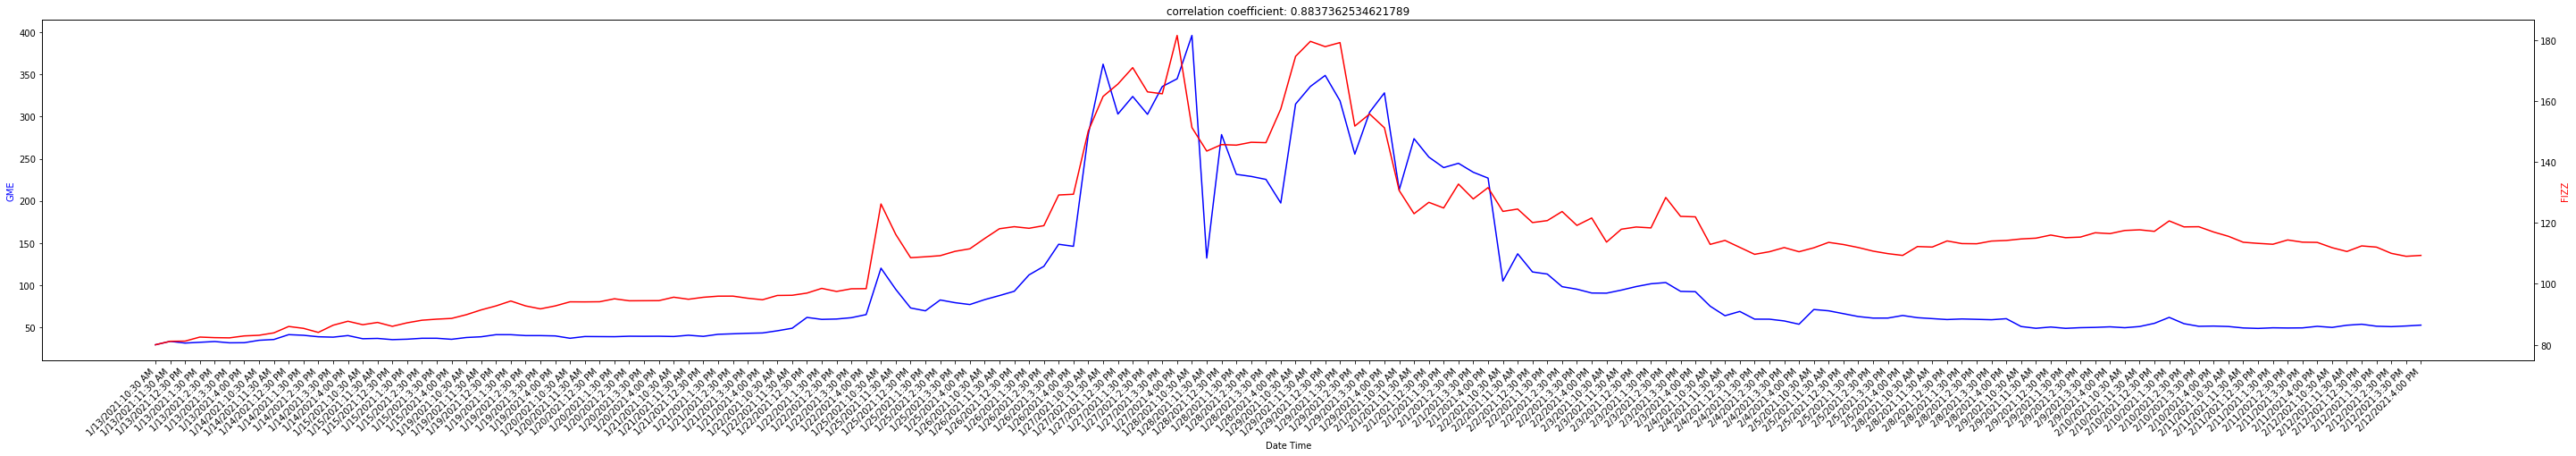

In [9]:
df_max = df_sh[df_sh['Symbol'].str.match('^'+maxkey+'$')]
fig, ax1 = plt.subplots(figsize = (50,7))

ax2 = ax1.twinx()
ax1.plot(df_gme['Datetime'], df_gme['Close'], color='blue')
ax2.plot(df_max['Datetime'], df_max['Close'], color='red')

xticklabels = df_sh['Datetime']
ax1.set_xlabel('Date Time')
ax1.set_xticklabels(xticklabels, rotation = 45, ha="right")
ax1.set_ylabel('GME', color='blue')
ax2.set_ylabel(maxkey, color='red')
ax2.set_title('correlation coefficient: ' + str(ticker_coeff_dict[maxkey]))
plt.show()

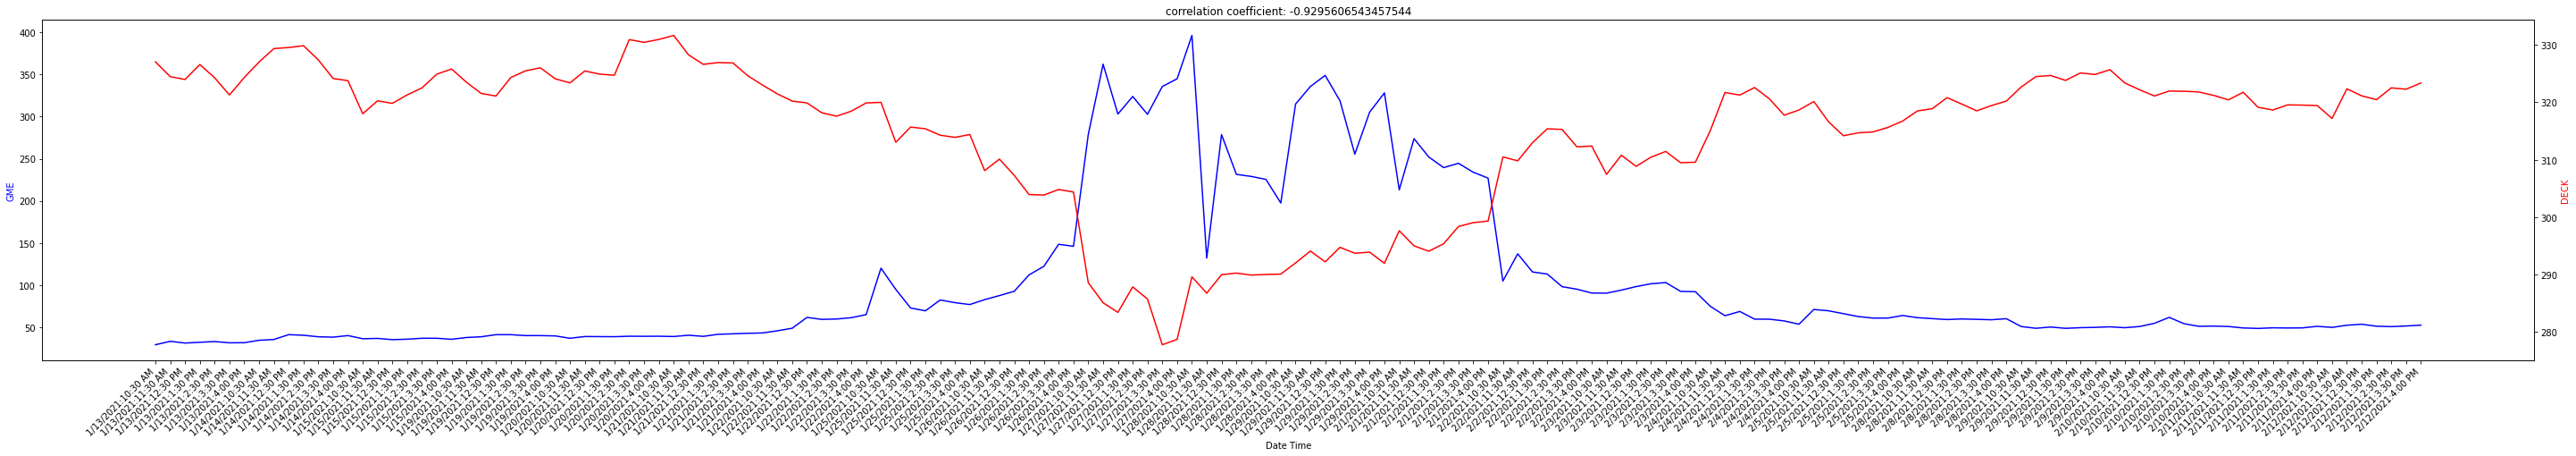

In [10]:
df_min = df_sh[df_sh['Symbol'].str.match('^'+minkey+'$')]
fig, ax1 = plt.subplots(figsize = (50,7))

ax2 = ax1.twinx()
ax1.plot(df_gme['Datetime'], df_gme['Close'], color='blue')
ax2.plot(df_min['Datetime'], df_min['Close'], color='red')

xticklabels = df_sh['Datetime']
ax1.set_xlabel('Date Time')
ax1.set_xticklabels(xticklabels, rotation = 45, ha="right")
ax1.set_ylabel('GME', color='blue')
ax2.set_ylabel(minkey, color='red')
ax2.set_title('correlation coefficient: ' + str(ticker_coeff_dict[minkey]))
plt.show()

In [ ]:
for ticker in ticker_list:
    try:
        df_temp = df_sh[df_sh['Symbol'].str.match('^'+ticker+'$')]
        fig, ax1 = plt.subplots(figsize = (50,10))
        ax2 = ax1.twinx()
        ax1.plot(df_gme['Datetime'], df_gme['Close'], color='blue')
        ax2.plot(df_temp['Datetime'], df_temp['Close'], color='red')

        xticklabels = df_sh['Datetime']
        ax1.set_xlabel('Date Time')
        ax1.set_xticklabels(xticklabels, rotation = 45, ha="right")
        ax1.set_ylabel('GME', color='blue')
        ax2.set_ylabel(ticker, color='red')
        ax2.set_title('correlation coefficient: ' + str(ticker_coeff_dict[ticker]))
        fig1 = plt.gcf()
        plt.draw()
        plt.savefig('Documents/charts/gme_comparison/gme_'+ticker+'.png')
    except:
        print('error with ticker: {}'.format(ticker))
   